Epsilon-Greedy ε = 0.1: processed in 14.33 seconds.
Epsilon-Greedy ε = 0.01: processed in 13.62 seconds.
Epsilon-Greedy ε = 0.001: processed in 13.38 seconds.
UCB c = 1: processed in 128.24 seconds.
UCB c = 2: processed in 125.53 seconds.
UCB c = 3: processed in 124.70 seconds.
UCB c = 4: processed in 126.06 seconds.


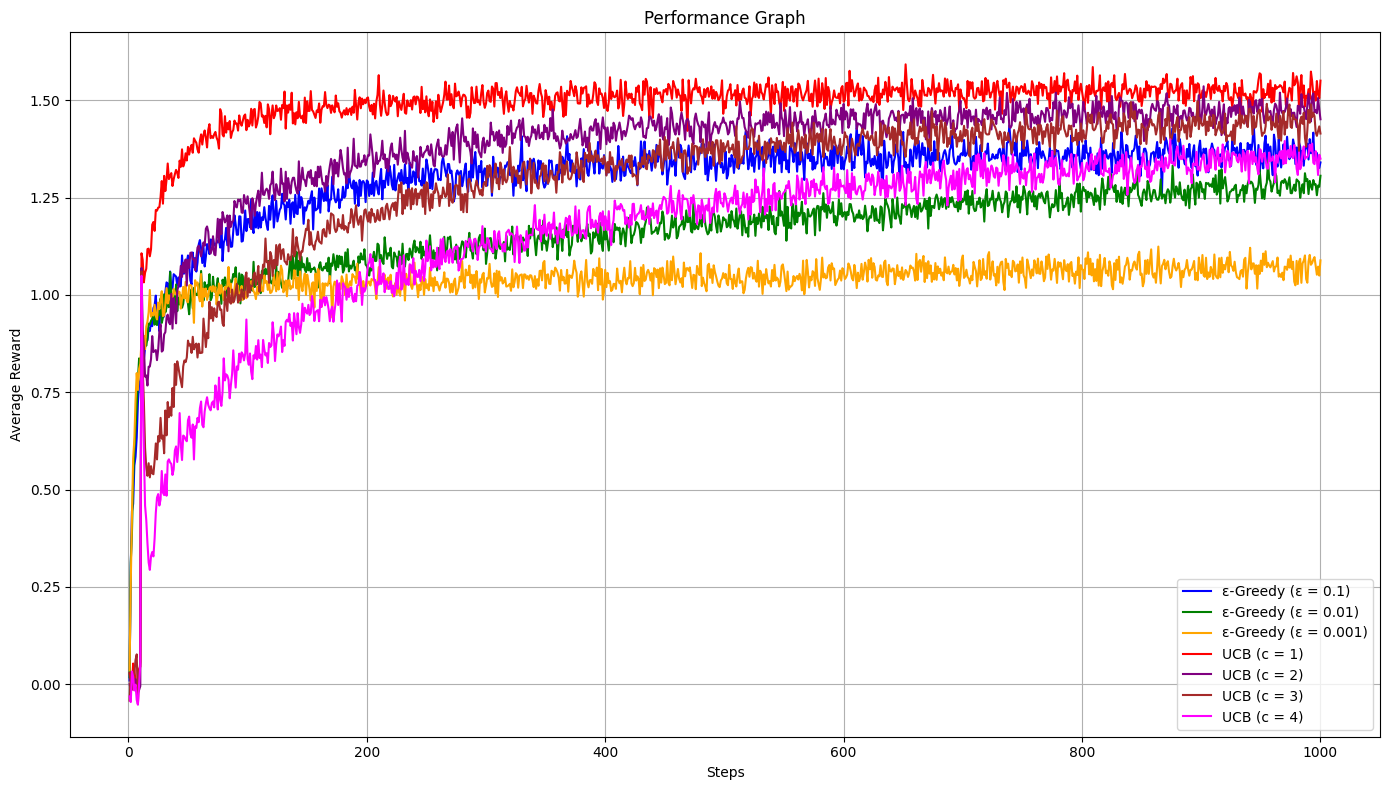

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
class narmedbandit:
    def __init__(self, n_arms=10, init_value=0):
        self.n_arms = n_arms
        self.truevalues = np.random.normal(0, 1, n_arms)
        self.estimates = np.ones(n_arms) * init_value
        self.actioncounts = np.zeros(n_arms)
    def pullarm(self, arm):
        return np.random.normal(self.truevalues[arm], 1)
    def updtestimates(self, arm, reward):
        self.actioncounts[arm] += 1
        self.estimates[arm] += (reward - self.estimates[arm]) / self.actioncounts[arm]
def selectaction_eps(estimates, epsilon):
    return np.random.randint(len(estimates)) if np.random.random() < epsilon else np.argmax(estimates)
def selectaction_ucb(estimates, counts, t, c):
    n_arms = len(estimates)
    ucb_values = np.zeros(n_arms)
    for a in range(n_arms):
        if counts[a] == 0:
            return a
        bonus = c * np.sqrt(np.log(t) / counts[a])
        ucb_values[a] = estimates[a] + bonus
    return np.argmax(ucb_values)
def run_eps_experiment(n_bandits=2000, n_steps=1000, epsilon=0.1):
    rewards = np.zeros((n_bandits, n_steps))
    start = time.time()
    for bandit_idx in range(n_bandits):
        bandit = narmedbandit()
        for step in range(n_steps):
            arm = selectaction_eps(bandit.estimates, epsilon)
            reward = bandit.pullarm(arm)
            bandit.updtestimates(arm, reward)
            rewards[bandit_idx, step] = reward
    elapsed = time.time() - start
    print(f"Epsilon-Greedy ε = {epsilon}: processed in {elapsed:.2f} seconds.")
    return rewards.mean(axis=0)
def run_ucb_experiment(n_bandits=2000, n_steps=1000, c=1):
    rewards = np.zeros((n_bandits, n_steps))
    start = time.time()
    for bandit_idx in range(n_bandits):
        bandit = narmedbandit()
        for t in range(1, n_steps + 1):
            arm = selectaction_ucb(bandit.estimates, bandit.actioncounts, t, c)
            reward = bandit.pullarm(arm)
            bandit.updtestimates(arm, reward)
            rewards[bandit_idx, t - 1] = reward
    elapsed = time.time() - start
    print(f"UCB c = {c}: processed in {elapsed:.2f} seconds.")
    return rewards.mean(axis=0)
def plotresults():
    n_steps = 1000
    steps = np.arange(1, n_steps + 1)
    plt.figure(figsize=(14, 8))
    epsilons = [0.1, 0.01, 0.001]
    colors = ['blue', 'green', 'orange']
    for i, eps in enumerate(epsilons):
        rewards = run_eps_experiment(epsilon=eps)
        plt.plot(steps, rewards, label=f"ε-Greedy (ε = {eps})", color=colors[i])
    cs = [1, 2, 3, 4]
    ucb_colors = ['red', 'purple', 'brown', 'magenta']
    for i, c in enumerate(cs):
        rewards = run_ucb_experiment(c=c)
        plt.plot(steps, rewards, label=f"UCB (c = {c})", color=ucb_colors[i])
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    plt.title("Performance Graph")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
plotresults()